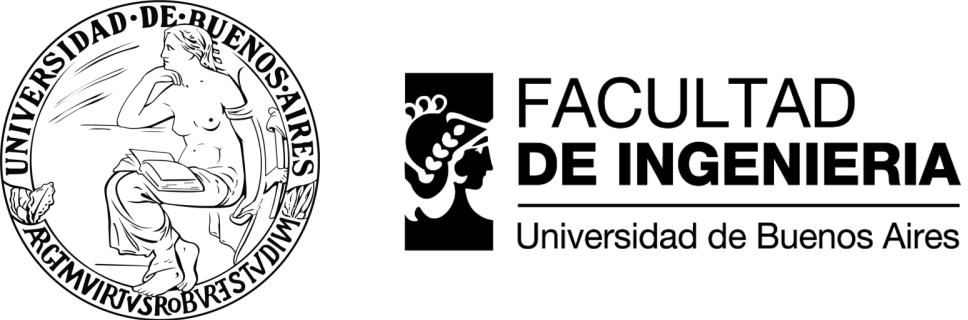

<h2><center>[75.12 - 95.04] Análisis Numérico</center></h2>
<h3><center>Trabajo Práctico 2 - 1er cuatrimestre 2023</center></h3>

---


<h1><center>Ecuaciones diferenciales ordinarias</center></h1>



---
Autores:

*   **Dávila, Rebeca.**

Legajo 108167

<rdavila@fi.uba.ar>
*   **Ochoa, Amalia.**

Legajo 107129

<amochoa@fi.uba.ar>
* **Perico, Santiago**

Legajo 104460

<sperico@fi.uba.ar>


---
Lenguaje utilizado: Python

---

# Índice
1. [Objetivos](#objetivos)
2. [Resolución por el método de Euler](#resolucion_euler)
  1. [Análisis de estabilidad](#estabilidad_euler)
3. [Resolución por el método de Rang Kutta](#resolucion_rk)


## Objetivos <a name="objetivos"></a>



---



&nbsp;&nbsp;&nbsp; En este trabajo se realiza un caso de estudio sobre las ecuaciones de Lotka Volterra, utilizando distintos métodos de resolución de ecuaciones diferenciales ordinarias.

*   Utilizamos el método de Euler para hallar la discretización y encontrar las soluciones del sistma en un intervalo $t \in [0,30]$
*   Mediante Jacobi se realizará el análisis de estabilidad del método.
*   Mediante Runge-Kutta de orden cuatro se generarán las soluciones en el mismo intervalo para graficar y ver el comportamiento del mismo.


## Resolución por el método del Euler <a name="resolucion_euler"></a>



---
&nbsp;&nbsp;&nbsp; En esta sección se resolverá el sistema de ecuaciones diferenciales Volterra-Lota, que se corresponden al modelo depredador-presa visto en la naturaleza. Las ecuaciones son las siguientes:

$ \frac{\delta x}{\delta t} = 1,2x − 0,6xy$

$  \frac{\delta y}{\delta t} = 0,3xy − 0,8y$

Si discretizamos el problema tomando a $\frac{\delta x }{\delta t} = f(x,y,t)$ y $\frac{\delta y }{\delta t} = g(x,y,t)$, podemos reescribir el sistema para plantear el método de Euler:

$x_{n+1} = x_n + h ⋅ \underbrace{(1,2x_n − 0,6x_ny_n)}_{f(x_n, y_n, t_n)}$

$y_{n+1} = y_n + h ⋅ \underbrace{(0,3x_ny_n -0,8y_n)}_{g(x_n, y_n, t_n)}$

&nbsp;&nbsp;&nbsp; Tomaremos como valores iniciales $x_{t=0}=2$  y  $y_{t=0}=1$, luego para definir el paso $h$ podemos usar la relación $h=\frac{(b-a)}{n}$. Como se  va a resolver para el intervalo $t∈[0,30]$, se propone realizar 300 muestras y en consecuencia se obtiene un paso de $h=0,1$. En el  siguiente script se inicializan las variables y funciones a utilizar.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# funciones f y g
def f(t, x, y):
  return a*x -b*x*y

def g(t, x, y):
  return d*x*y - c*y

# Parámetros de las ecuaciones
a = 1.2
b = 0.6
c = 0.8
d = 0.3

# Condiciones iniciales
t0 = 0
x0 = 2
y0 = 1

# parámetros del algoritmo
h = 0.1
muestras = 300

En el siguiente bloque se programa la función del método de Euler y se realiza una tabla para los resultados obtenidos

In [ ]:
#metodo euler: y_{i+1} = y_i +h * f(t_i , y_i)
#se generan aproximaciones a la solucion en el intervalo [a,b] de la forma t_i = a+i*h, con * entre 1,..,n
#donde h=(b-a)/n

def euler(f,g,t0,x0,y0,h,muestras):
    tabla = {'t':[t0], 'x':[x0], 'y': [y0]}
    ti = t0
    xi = x0
    yi = y0

    for i in range(1,muestras +1):
        x_siguiente = h * f(ti,xi,yi)
        y_siguiente = h * g(ti,xi,yi)

        xi = xi + x_siguiente
        yi = yi + y_siguiente
        ti = ti + h

        tabla['t'].append(ti)
        tabla['x'].append(xi)
        tabla['y'].append(yi)

    tabla = pd.DataFrame(tabla)
    tabla = tabla.drop(0)
    return(tabla)


# se genera la tabla
tabla = euler(f,g,t0,x0,y0,h,muestras)
tabla

,t,x,y
1,0.1,2.120000,0.980000
2,0.2,2.249744,0.963928
3,0.3,2.389598,0.951871
4,0.4,2.539874,0.943959
5,0.5,2.700807,0.940369
...,...,...,...
296,29.6,0.015979,0.631993
297,29.7,0.017291,0.581736
298,29.8,0.018762,0.535499
299,29.9,0.020411,0.492960


###Análisis de estabilidad del método de Euler <a name="estabilidad_euler"></a>


---

&nbsp;&nbsp;&nbsp; La estrategia para el análisis de estabilidad de Euler será encontrar una expresión lineal del sistema de ecuaciones perturbados. Con esto se armará la matriz $T_j$ de Jacobi y se evaluará la convergencia del mismo ya que, si la matriz converge, entonces el método por Euler es estable.

&nbsp;&nbsp;&nbsp; Como primer paso se toman las discretizaciones utilizadas anteriormente y se perturba el sistema de forma tal que $\epsilon_{n} ≪ x_n$ y $\delta_{n} ≪ y_n$. El sistema queda:


$\begin{cases} (x_{n+1} + \epsilon_{n+1}) = (x_n + \epsilon_{n})+ h \cdot (1,2\cdot(x_n + \epsilon_{n}) - 0,6\cdot(x_n + \epsilon_{n})\cdot(y_n + \delta_{n})) \\ (y_{n+1} + \delta_{n+1}) = (y_n + \delta_{n}) + h \cdot (0,3\cdot(x_n + \epsilon_{n})\cdot(y_n + \delta_{n}) - 0,8(y_n + \delta_{n})) \end{cases}$

&nbsp;&nbsp;&nbsp; Luego, se propone desarrollar los productos para luego restar por las expresiones originales discretizadas. Desarrollando el producto de las variables perturbadas el sistema queda:

$\begin{cases} \color{magenta}{x_{n+1}} + \epsilon_{n+1} = \color{magenta}{x_n} + \epsilon_{n} + \color{magenta}{1,2hx_n} + 1,2hϵ_n \color{magenta}{- 0,6h(x_ny_n)} - 0,6h(x_nδ_n + \epsilon_ny_n + ϵ_n \delta_n)        \\ \color{magenta}{y_{n+1}} + \delta_{n+1} = \color{magenta}{y_n} + \delta_{n} + \color{magenta}{0,3h(x_ny_n)} +0,3h(x_n \delta_n + \epsilon_n y_n + \epsilon_n \delta_n) \color{magenta}{-0,8hy_n} -0,8h\delta_n \end{cases}$


&nbsp;&nbsp;&nbsp; Si se restan estas ecuaciones con las correspondientes ecuaciones discretizadas sin perturbar, se puede obtener la expresión de la perturbación para cada caso. Para mayor claridad se indicó con $\color{magenta}{violeta}$ en el sistema anterior los términos que serían eliminados. El sistema queda:

$ \begin{cases} \epsilon_{n+1} = \epsilon_{n} + 1,2 h  \epsilon_{n} -0,6 h  x_{n}  \delta_{n} -0,6 h  \epsilon_{n}  y_{n} -\color{orange}{0,6 h \epsilon_{n}  \delta_{n}} \\ \delta_{n+1} = \delta_{n} + 0,3 h  x_{n}  \delta_{n}  + 0,3 h  \epsilon_{n}  y_{n} +\color{orange}{0,3 h  \epsilon_{n}  \delta_{n}} -0.8 h\delta_{n} \end{cases}$

&nbsp;&nbsp;&nbsp; Debido a los términos indicados en $\color{orange}{naranja}$, la relación en las perturbaciones es no lineal, con lo que no podemos escribir su forma matricial. Pero si tenemos en cuenta que $\epsilon_{n} ≪ x_n$ y $\delta_{n} ≪ y_n$ postulado anteriormente, podemos considerar que la multiplicación $\epsilon_{n} \cdot \delta_{n}$ da como resultado un número muy pequeño, por lo que se desprecia el término. De esta forma conseguimos una relación lineal:

$ \begin{cases} \epsilon_{n+1} = \epsilon_{n}(1 + 1,2 h -0,6 hy_{n}) + \delta_{n}(-0,6 h  x_{n}) \\ \delta_{n+1} = \epsilon_{n}( 0,3 h  y_{n})  +\delta_{n}(1+ 0,3 h  x_{n}  -0,8 h) \end{cases}$

Escrito de forma matricial $Ax= b$:

$
\begin{bmatrix}
\epsilon_{n+1}\\
\delta_{n+1} \\
\end{bmatrix}
= \begin{bmatrix}
\ 1 + 1,2 h -0,6 h y_{n} & -0,6 h x_{n}\\
\ 0,3 h  y_{n} & 1 + 0,3 h x_{n} -0,8 h \\
\end{bmatrix}
\begin{bmatrix}
\epsilon_{n}\\
\delta_{n}  \\
\end{bmatrix}
$

&nbsp;&nbsp;&nbsp; Nos interesa escribirlo de forma matricial ya que podemos evaluar la estabilidad a través de jacobi. Si el radio espectral de la matriz $T_j$ es menor a uno, entonces el método por jacobi converge y por ende el método de Euler es estable.

Se define $T_j = D^{-1}(L+U)$. Donde $D$ es la mariz diagonal de $A$, $L$ la matriz traingular inferior de $A$ y $U$ la martiz triangular superior de $A$ de forma que se cumpla $A = D -L -U$. Es decir:

$A = \underbrace{\begin{bmatrix}
1+1,2h-0,6y_n h & 0               \\
0                & 1-0,8h+0,3hx_n
\end{bmatrix}}_D - \underbrace{\begin{bmatrix}
0 & 0               \\
-0,3y_nh                & 0
\end{bmatrix}}_L - \underbrace{\begin{bmatrix}
0 & 0,6x_nh               \\
0             & 0
\end{bmatrix}}_U
$

Como D es una matriz diagonal su inversa sera la matriz con sus elementos invertidos, entonces:

$T_j = \underbrace{\begin{bmatrix}
\frac 1{1+1,2h-0,6y_n h} & 0               \\
0                & \frac 1{1-0,8h+0,3hx_n}
\end{bmatrix}}_{D^{-1}}\cdot \underbrace{\begin{bmatrix}
0 & 0,6x_nh               \\
-0,3y_nh                & 0
\end{bmatrix}}_{L+U}$

$⇒T_j = \begin{bmatrix}
0 & \frac{0,6hx_n}{1+1,2h-0,6y_nh}               \\
\frac{-0,3y_nh}{1-0,8h+0,3hx_n}                & 0
\end{bmatrix} $

Se define el radio espectral como el $max|\lambda_i|$, podemos hallar los autovalores de $T_j$ evaluando $det(T_j -\lambda I)=0$

$det\begin{bmatrix}
-λ & \frac{0,6hx_n}{1+1,2h-0,6y_nh}               \\
\frac{-0,3y_nh}{1-0,8h+0,3hx_n}                & -λ
\end{bmatrix} =0$

$\begin{align}\\ \Rightarrow & λ^2 - \big( \frac{0,6hx_n}{1+1,2h-0,6y_nh} ⋅ \frac{-0,3y_nh}{1-0,8h+0,3hx_n} \big) = 0 \\ & λ^2 = \big( \frac{0,6hx_n}{1+1,2h-0,6y_nh} ⋅ \frac{-0,3y_nh}{1-0,8h+0,3hx_n} \big) \\ \\& λ = \sqrt{\frac{0,6hx_n}{1+1,2h-0,6y_nh} ⋅ \frac{-0,3y_nh}{1-0,8h+0,3hx_n}} \end{align}$

Como existe un único autovalor de la matriz $T_j$, esta converge si y solo si

$|λ| = \sqrt{\frac{0,6hx_n}{1+1,2h-0,6y_nh} ⋅ \frac{-0,3y_nh}{1-0,8h+0,3hx_n}} < 1$

y si el análisis por jacobi converge, entonces el método por Euler es estable.

## Resolución por el método de Rang Kutta <a name="resolucion_rk"></a>



---

&nbsp;&nbsp;&nbsp; Se utilizará el método de Runge-Kutta de orden cuatro con $h = 0.1$, para obtener las soluciones de $t ∈[0, 30]$. En el bloque siguiente se programa el algoritmo y se grafican las soluciones correspondientes.


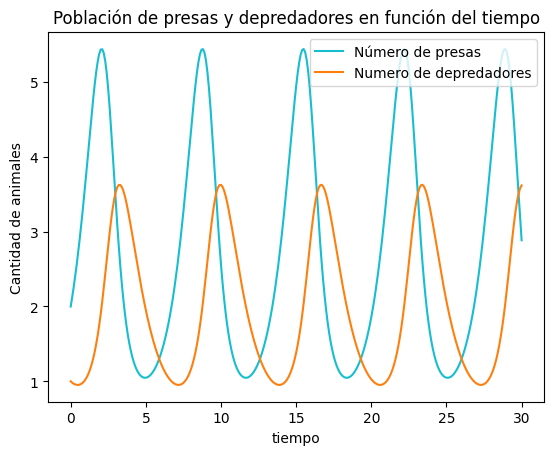

In [ ]:
def rk4(f,g,t0,x0,y0,h,muestras):
    tabla = {'t':[t0], 'x':[x0], 'y': [y0]}
    ti = t0
    xi = x0
    yi = y0
    for i in range(1, muestras +1):
        K1x = h * f(ti,xi,yi)
        K1y = h * g(ti,xi,yi)

        K2x = h * f(ti+h/2, xi + K1x/2, yi+K1y/2)
        K2y = h * g(ti+h/2, xi + K1x/2, yi+K1y/2)

        K3x = h * f(ti+h/2, xi + K2x/2, yi + K2y/2)
        K3y = h * g(ti+h/2, xi + K2x/2, yi + K2y/2)

        K4x = h * f(xi+h, xi + K3x, yi + K3y)
        K4y = h * g(xi+h, xi + K3x, yi + K3y)

        xi = xi + (K1x+2*K2x+2*K3x+K4x)*1/6
        yi = yi + (K1y+2*K2y+2*K3y+K4y)*1/6
        ti = ti + h

        tabla['t'].append(ti)
        tabla['x'].append(xi)
        tabla['y'].append(yi)

    tabla = pd.DataFrame(tabla)
    return(tabla)


# se grafica
tabla = rk4(f,g,t0,x0,y0,h,muestras)
ti = tabla['t']
xi = tabla['x']
yi = tabla['y']


plt.plot(ti, xi, color = 'C9', label = 'Número de presas')
plt.plot(ti, yi, color = 'C1', label = 'Numero de depredadores')
plt.legend()
plt.xlabel("tiempo")
plt.ylabel("Cantidad de animales")
plt.title("Población de presas y depredadores en función del tiempo")
plt.show()

